# Adquirindo Dados e analisando a série com os preços

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go


In [2]:
yf_brent_oil = yf.download('BZ=F')
yf_brent_oil

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F
Date,,,,,,
2007-07-30,75.739998,75.739998,76.529999,75.440002,75.849998,2575
2007-07-31,77.050003,77.050003,77.169998,75.669998,75.699997,3513
2007-08-01,75.349998,75.349998,77.059998,74.860001,77.000000,3930
2007-08-02,75.760002,75.760002,76.209999,74.269997,75.220001,6180
2007-08-03,74.750000,74.750000,76.000000,74.529999,75.389999,4387
...,...,...,...,...,...,...
2024-11-19,73.309998,73.309998,73.870003,72.610001,73.180000,32668
2024-11-20,72.809998,72.809998,73.940002,72.699997,73.339996,26041


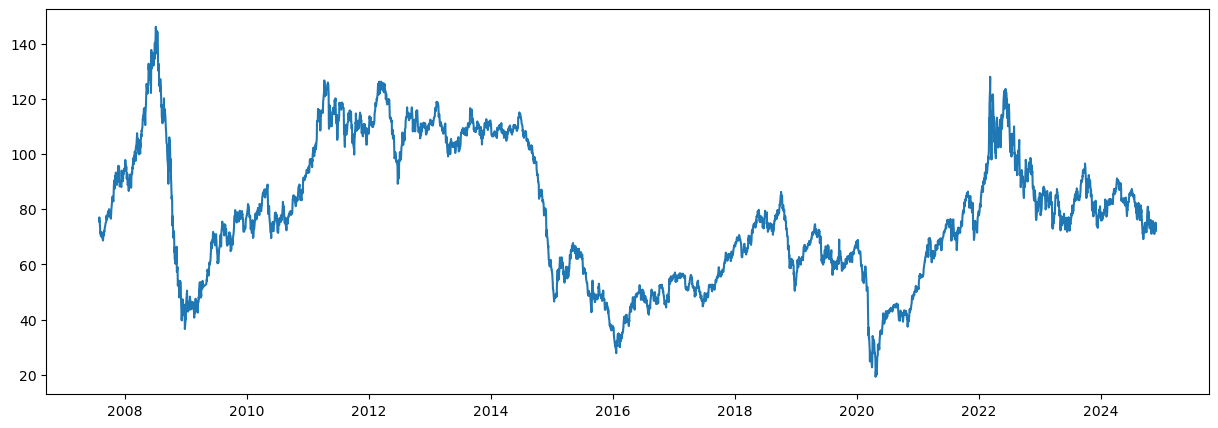

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(yf_brent_oil['Close'])

d:\AnaCondaDir\Lib\site-packages\matplotlib\text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



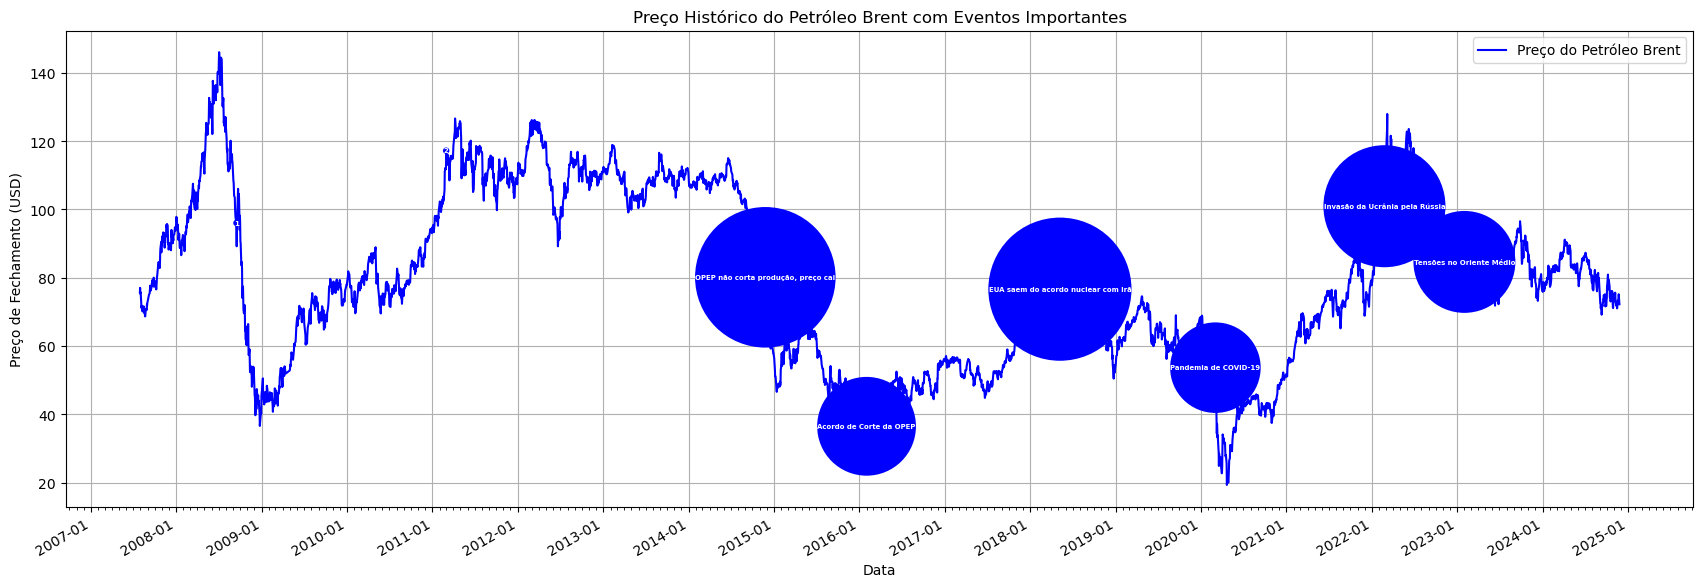

In [20]:
yf_brent_oil.index = pd.to_datetime(yf_brent_oil.index)

plt.figure(figsize=(21, 7))
plt.plot(yf_brent_oil.index, yf_brent_oil['Close'], label='Preço do Petróleo Brent', color='blue')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotação automática para melhorar a legibilidade

# Adicionando eventos significativos como anotações
events = {
    '2008-09-15': '1',
    '2011-03-01': '2',
    '2014-11-25': 'OPEP não corta produção, preço cai',
    '2016-02-01': 'Acordo de Corte da OPEP',
    '2018-05-08': 'EUA saem do acordo nuclear com Irã',
    '2020-03-03': 'Pandemia de COVID-19',
    '2022-02-24': 'Invasão da Ucrânia pela Rússia',
    '2023-02-01': 'Tensões no Oriente Médio'
}

for date, event in events.items():
    date = pd.to_datetime(date)
    if date in yf_brent_oil.index:
        plt.annotate(event, 
                     (date, yf_brent_oil.loc[date, 'Close']),  # Alterado para loc[] aqui
                     textcoords="offset points",
                     xytext=(0,3),
                     ha='center',
                     fontsize=5, weight='bold',
                     color='white', backgroundcolor='blue',
                     bbox=dict(boxstyle='circle,pad=0.03', facecolor='blue', edgecolor='none'))

# Melhorando a legibilidade
plt.title('Preço Histórico do Petróleo Brent com Eventos Importantes')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

